In [1]:
import sys

sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
from tests.uniform import Unif
from tests.normal import Norm

In [4]:
from src.CharFuncInverter.CharFuncInverter import CharFuncInverter

Характеристическая функция имеет следующий вид:
$$\phi_X(t) = \mathbb{E} e^{itX} = \int\limits_{\mathbb{R}}e^{itx}f_X(x)dx.$$

То есть характеристическая функция -- это преобразование Фурье плотности распределения случайной величины.

Таким образом, при помощи обратного преобразования Фурье мы можем получить функцию плотности:
$$f_X(x) = \frac{1}{2\pi}\int\limits_{\mathbb{R}}e^{-itx}\phi_X(t)dt.$$


Зная функцию плотности, можно получить функцию распределения:
$$
\begin{align*}
F_X(x) &= \mathbb{P}(X < x) =  \int\limits_{-\infty}^{x}f_X(u)du
= \frac{1}{2\pi}\int\limits_{-\infty}^{x}   \int\limits_{-\infty}^{\infty}e^{-itu}\phi_X(t)dt   du =\\
&=\frac{1}{2} - \frac{1}{2\pi}\int\limits_{\mathbb{R}}\frac{e^{-itx}\phi_X(t)}{it}dt
\end{align*}
$$

In [87]:
class FTInverterNaive(CharFuncInverter):

    def __init__(self, N=1e3, delta=1e-1, num_points = None):
        super().__init__()
        self.N = int(N)
        self.delta = delta
        if num_points is None:
            self.num_points = int(N // delta)
        else:
            self.num_points = num_points

    def fit(self, phi):
        """phi = characteristic function"""
        self.phi = phi

    def cdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)
        
        phi_t = self.phi(t)


        integral = np.trapezoid((phi_t * np.exp(-1j * t * x[:, np.newaxis]))/(1j*t), t, axis=1)
        return 1/2 - (1 / (2 * np.pi)) * integral

    def pdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)

        phi_t = self.phi(t)

        integral = np.trapezoid(phi_t * np.exp(1j * t * x[:, np.newaxis]), t, axis=1)

        return (1 / (2 * np.pi)) * integral

In [55]:
inv = FTInverterNaive(num_points=10000)

# Нормальное распределение

In [26]:
normal = Norm(0, 1)
inv.fit(normal.chr)

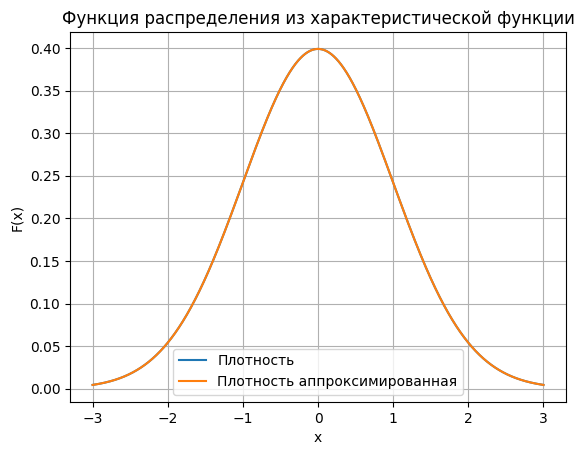

In [27]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = normal.pdf(x)
plt.plot(x, df_true, label='Плотность')
plt.plot(x, distribution_values, label='Плотность аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()


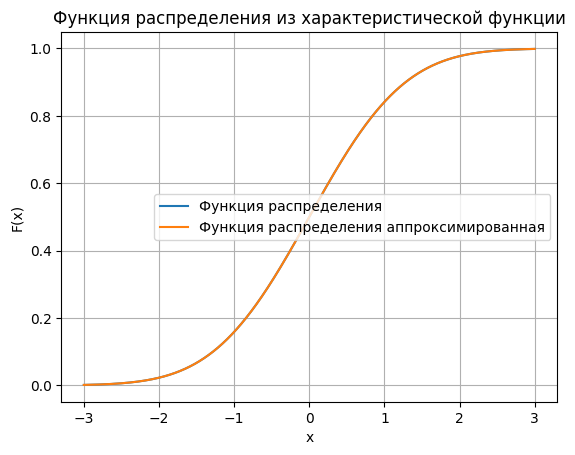

In [28]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.cdf(x)
df_true = normal.cdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

Если брать N = 1e8 то там что-то всё как-то неприятно получается...

# Равномерное распределение

In [93]:
inv = FTInverterNaive(N=10, num_points=10000)
uniform = Unif(0, 1)
inv.fit(uniform.cdf)

### на [0,1]

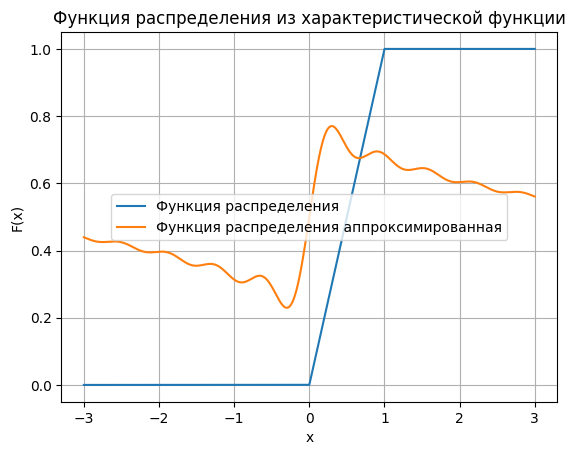

In [94]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.cdf(x)
df_true = uniform.cdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

[0. 0. 0. ... 0. 0. 0.]


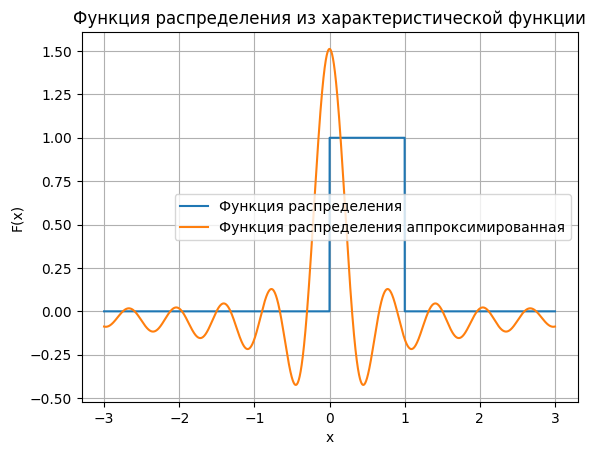

In [95]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = uniform.pdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

### на [-1, 1]

In [89]:
uniform = Unif(-1, 1)
inv.fit(uniform.chr)

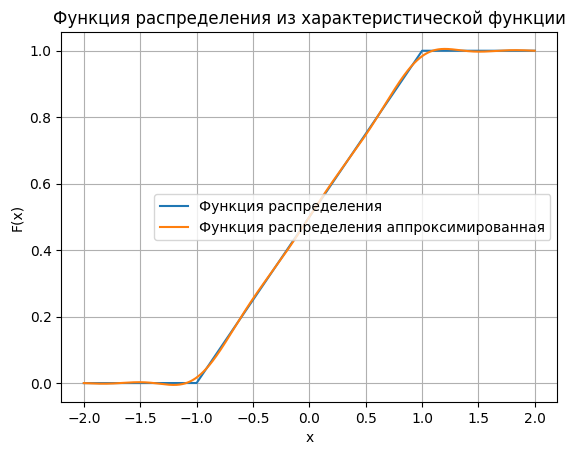

In [90]:
x = np.linspace(-2, 2, 10000)
distribution_values = inv.cdf(x)
df_true = uniform.cdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

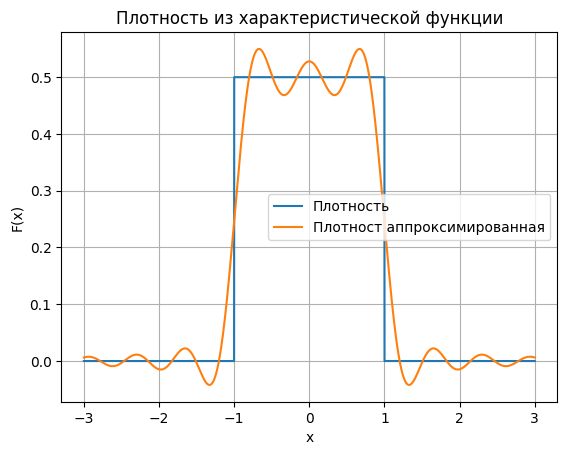

In [91]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = uniform.pdf(x)
plt.plot(x, df_true, label='Плотность')
plt.plot(x, distribution_values, label='Плотност аппроксимированная')
plt.title('Плотность из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()